<a href="https://colab.research.google.com/github/Garvaneja/comp215/blob/main/labs/lab06_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 6
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * create a Watts-Strogatz graph both from scratch and from the Networkx module
  * measure the average clustering coefficient and path length of a network
  * visualize summative data of a graph


During this lab, you will be introduced to the following:
  * numpy arrays
  * local file i/o in Google Colab

(this lab is based on workbooks provided in Allen Downey's 'Think Complexity')

## Social Networking

This lab uses graphs to explore social networks using Facebook data.  In this lab you will create a simulated model of the network using a Watts-Strogatz graph and compare some properties of the simulated network and the real Facebook network.

In [1]:
# put your imports here

In [23]:
import numpy as np
import networkx as nx
import random
from collections import deque
import matplotlib.pyplot as plt



## Get the Facebook Data

Stanford Network Analysis Platform (SNAP) is a general purpose network analysis and graph mining library.  In previous labs, we have used APIs to access data.  For this lab, we will copy the data to a local file.  Download the ```facebook_combined.txt.gz``` file from [SNAP](https://snap.stanford.edu/data/egonets-Facebook.html), unzip it, and copy ```facebook_combined.txt``` to the ```Files``` folder in Colab.  

Look at the content of the file and read the SNAP webpage to understand what the data represents before moving on to the rest of the lab.

## Exercise 1: Make Facebook Graph

Write a function that reads the file, one edge per line, specified by the two integer node IDs given in each line of the file and returns a ```networkx``` graph representing the data.  You can do this with Python's built-in file handling, or you could use ```numpy```'s ```loadtxt``` function.  Write a unit test to check that the network has 4039 nodes and 88234 edges (as given in the Dataset Statistics on the SNAP site) and draw the Facebook network (this takes about a minute).


Test passed: Graph has correct number of nodes and edges.


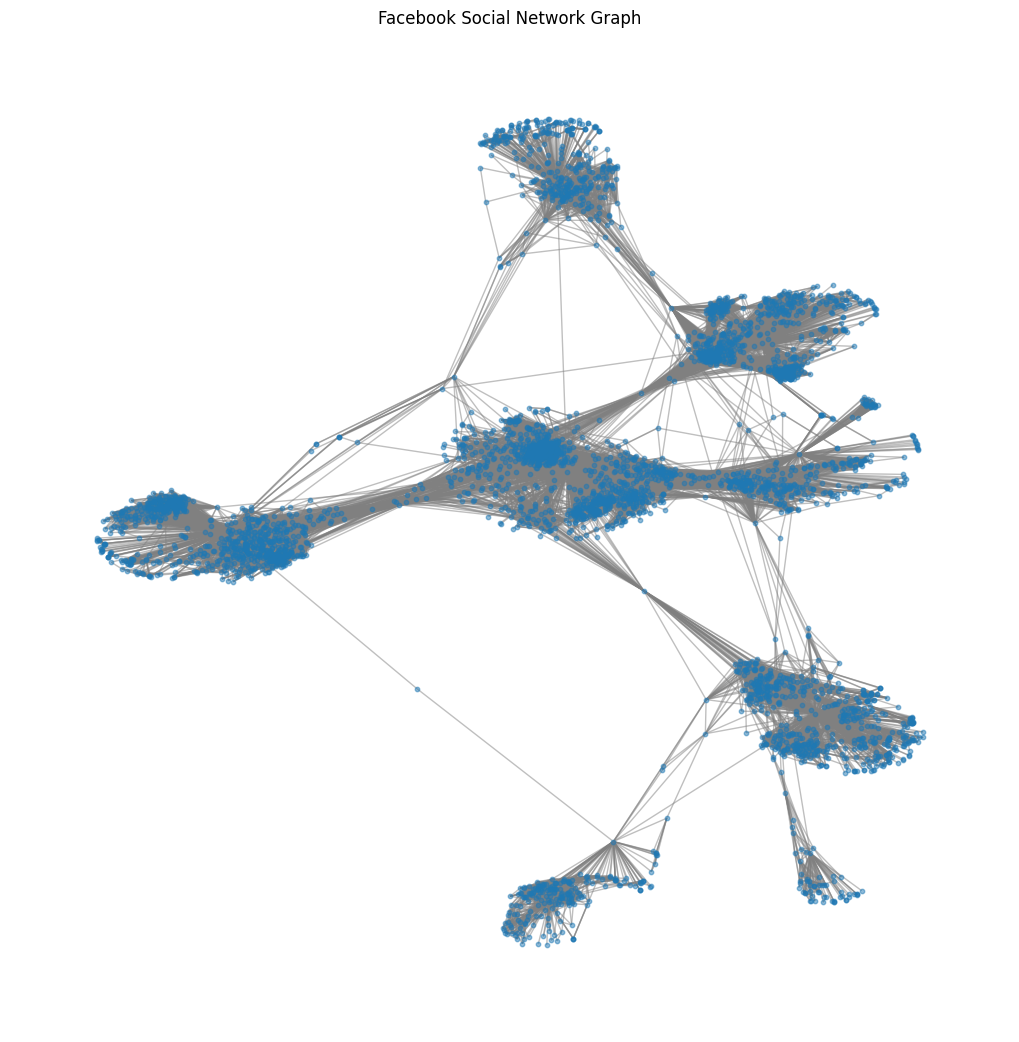

In [22]:
# Ex 1 code here
def make_facebook_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as f:
        for line in f:
            node1, node2 = map(int, line.strip().split())
            G.add_edge(node1, node2)
    return G

def test_facebook_graph():
    #Unit test to verify the graph has 4039 nodes and 88234 edges.

    filename = "facebook_combined.txt"
    G = make_facebook_graph(filename)
    assert G.number_of_nodes() == 4039, f"Expected 4039 nodes, got {G.number_of_nodes()}"
    assert G.number_of_edges() == 88234, f"Expected 88234 edges, got {G.number_of_edges()}"
    print("Test passed!")

def draw_facebook_graph(G):
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, edge_color="gray", alpha=0.5)
    plt.title("Facebook Social Network Graph")
    plt.show()


filename = "facebook_combined.txt"
G = make_facebook_graph(filename)
test_facebook_graph()
draw_facebook_graph(G)




## Exercise 2: Clustering Coefficients

With larger graphs, it can take a long time to compute clustering coefficients and path lengths. We can estimate them by sampling without much loss of accuracy if the sample size is large enough.  Write a function that calculates the average clustering coeffient for a random subset of a N nodes in a network.  You may use the ```node_clustering``` and ```all_pairs``` functions from Chapter 5 of the textbook.  You may also use the ```numpy``` module to calculate the mean; note that there is a ```nanmean``` function.

Check that your clustering coeffients function gives a similar answer to the ```networkx``` ```average_clustering``` function.


In [25]:
# Ex 2 code here
import networkx as nx
import numpy as np
import random

def read_graph_from_file(file_path):
    edges = np.loadtxt(file_path, dtype=int)
    G = nx.Graph()
    G.add_edges_from(edges)

    return G

def average_clustering_coefficient_sample(G, N):

    nodes = list(G.nodes())
    sampled_nodes = random.sample(nodes,len(nodes))
    clustering_coeffs = [nx.clustering(G, node) for node in sampled_nodes]
    avg_clustering = np.nanmean(clustering_coeffs)
    return avg_clustering


def test_clustering_function(G, N):

    estimated_clustering = average_clustering_coefficient_sample(G, N)
    networkx_avg_clustering = nx.average_clustering(G)

    print(f"Estimated Average Clustering Coefficient (sample): {estimated_clustering}")
    print(f"NetworkX Average Clustering Coefficient: {networkx_avg_clustering}")

file_path = 'facebook_combined.txt'
graph = read_graph_from_file(file_path)
test_clustering_function(graph, 1000)



Estimated Average Clustering Coefficient (sample): 0.6055467186200862
NetworkX Average Clustering Coefficient: 0.6055467186200876


## Exercise 3: Average Shortest Path Length

Write a function that calculates the average shortest path length for all pairs of nodes in a network.  You may use the ```shortest_path_dijkstra``` function from Chapter 5 of the textbook.  Using that function, it took my algorithm about 2 minutes to find the average shortest path over all pairs of nodes.


Check that your average shortest path length function gives a similar answer to the ```networkx``` ```average_shortest_path_length``` function.


In [38]:
import networkx as nx
import numpy as np

def exact_shortest_path_length(G):
    """Returns the exact average shortest path length for the graph."""
    return nx.average_shortest_path_length(G)

def random_sample_path_lengths(G, selected_nodes=None, num_trials=100):
    """Randomly selects pairs of nodes and computes the shortest path length between them.
    G: Graph
    selected_nodes: List of nodes to sample from, if None, samples from all nodes.
    num_trials: Number of random pairs to sample.
    Returns a list of shortest path lengths.
    """
    if selected_nodes is None:
        selected_nodes = list(G.nodes)
    else:
        selected_nodes = list(selected_nodes)

    random_pairs = np.random.choice(selected_nodes, (num_trials, 2))
    path_lengths = [nx.shortest_path_length(G, *pair) for pair in random_pairs]
    return path_lengths

def estimate_average_path_length(G, selected_nodes=None, num_trials=1000):
    """Estimates the average shortest path length by averaging sampled path lengths."""
    sampled_lengths = random_sample_path_lengths(G, selected_nodes, num_trials)
    return np.mean(sampled_lengths)

def load_graph_from_file(file_path):
    """Loads a graph from an edge list file."""
    return nx.read_edgelist(file_path, nodetype=int)

def compare_shortest_path_lengths(G, num_trials=1000):
    """Compares the estimated and exact average shortest path lengths."""
    estimated_length = estimate_average_path_length(G, num_trials=num_trials)
    exact_length = nx.average_shortest_path_length(G)

    print(f"Estimated Average Shortest Path Length (Trials={num_trials}): {estimated_length:.4f}")
    print(f"Exact NetworkX Average Shortest Path Length: {exact_length:.4f}")

file_path = "/content/facebook_combined.txt"

compare_shortest_path_lengths(G, num_trials=1000)


KeyboardInterrupt: 

Here is a function from the textbook that takes a sample of path lengths to estimate the average shortest path length.  You may use this in the rest of the lab so that you don't need to wait for the whole full averaging algorithms above to run.

In [34]:
def sample_path_lengths(G, nodes=None, trials=100):
    """Choose random pairs of nodes and compute the path length between them.
    G: Graph
    N: number of pairs to choose
    returns: list of path lengths
    """
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)

    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair)
               for pair in pairs]
    return lengths

def estimate_path_length(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

In the exercises above, you should have found that the Facebook network has an average clustering coefficient around 0.6 and an average shortest path length of around 3.7. Note that this corresponds to a 'degree of separation' of less than 6.   

## Exercise 4: WS Graph

Construct a WS graph with the same number of nodes and average degree as the Facebook network using the ```make_ws_graph``` function from Chapter 5.  Find the value of p (probability of rewire) that reproduces a clustering coefficient and average shortest path length of the Facebook network.  (Note that there is a ```nx.watts_strogatz_graph``` that you may use after you have demonstrated that you can create a WS graph using the functions from Chapter 5.).

What could this value of p tell you about the actual social network that this Facebook data represents?  (Think about what p means in the model and what that would represent in the data.)

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to load the Facebook graph
def load_facebook_graph(file_path):
    """Loads the Facebook graph from an edge list file."""
    edges = np.loadtxt(file_path, dtype=int)
    G = nx.Graph()
    G.add_edges_from(edges)
    return G

def calculate_graph_metrics(G):
    """Calculates clustering coefficient and average shortest path length for the graph."""
    clustering = nx.average_clustering(G)
    avg_shortest_path = nx.average_shortest_path_length(G)
    return clustering, avg_shortest_path


file_path = "f/content/facebook_combined.txt"
facebook_graph = load_facebook_graph(file_path)

clustering_facebook, avg_shortest_path_facebook = calculate_graph_metrics(facebook_graph)

n = len(facebook_graph.nodes())
k = int(np.mean([deg for _, deg in facebook_graph.degree()]))

best_p = None
min_diff = float('inf')


p_values = np.linspace(0, 1, 100)
clustering_ws_values = []
avg_shortest_path_ws_values = []

for p in p_values:
    # Create the Watts-Strogatz graph for each p
    G_ws = nx.watts_strogatz_graph(n, k, p)

    # Calculate clustering and average shortest path length for the WS graph
    clustering_ws = nx.average_clustering(G_ws)
    avg_shortest_path_ws = nx.average_shortest_path_length(G_ws)


    clustering_ws_values.append(clustering_ws)
    avg_shortest_path_ws_values.append(avg_shortest_path_ws)

    # Calculate the difference between Facebook and WS graph properties
    diff = abs(clustering_ws - clustering_facebook) + abs(avg_shortest_path_ws - avg_shortest_path_facebook)

    if diff < min_diff:
        min_diff = diff
        best_p = p

print(f"The optimal rewiring probability (p) is: {best_p}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(p_values, clustering_ws_values, label="Clustering Coefficient")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Clustering Coefficient")
plt.title("Clustering Coefficient vs Rewiring Probability")


plt.subplot(1, 2, 2)
plt.plot(p_values, avg_shortest_path_ws_values, label="Average Shortest Path Length", color="red")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Average Shortest Path Length")
plt.title("Average Shortest Path Length vs Rewiring Probability")

plt.tight_layout()
plt.show()



Average Degree of Facebook Network: 43.69101262688784
Clustering Coefficient of Facebook Network: 0.6055467186200876
Average Shortest Path Length of Facebook Network: 3.6925068496963913
